Derrick Lor 4/25/2024
COMP 5430 Artificial Intelligence
Mid Project Update

System Requirements and Dependencies:
> Python version 3.10.6<br>
> Pygame version 2.5.2<br>
> Numpy version 1.23.3<br>
> Matplotlib version 3.7.1<br>
> Associated game files: black.png, board.png, white.png<br>



In [1]:
from Omok import *
import matplotlib.pyplot as plt
import numpy as np

pygame 2.5.2 (SDL 2.28.3, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


Run the code snip below to play my version of Omok with two players.

In [9]:
PlayOmokPygame(PLAYER, PLAYER)

Run the code snip below to play my version of Omok against my AI Omok bot.

In [ ]:
PlayOmokPygame(PLAYER, ENEMY)

Start collecting data and interpreting results from AI bot versus AI bot

Run the Omok game using my MDP for 3 runs each with 10 episodes, for total of 30 observed episodes and tally results in numpy lists. <br>
Also tally the wins for each player. Then display information in graphs.

In [3]:
runs = 3
episodes = 10
p1ScoreList = np.zeros((runs, episodes))
p2ScoreList = np.zeros((runs, episodes))
winrateList = np.zeros((3, episodes))

for k in range(runs):
    for i in range(episodes):
        board = Board(9, 5)
        p1Score = 0
        p2Score = 0
        running = True
        while running:
            if board.turn == PLAYER:#agent turn
                #rowAgent, colAgent = board.availableActions[0] #getAction
                #board.placePiece(rowAgent, colAgent)
                if board.piecesOnBoard < 2:
                    coord = board.get_random_neighbor(4, 4, 1)
                    rowAgent, colAgent = coord
                else:
                    rowAgent, colAgent, score = board.minimaxABPruning(1, -np.infty, np.infty, True)
                board.placePiece(rowAgent, colAgent)
                #p1Score = board.evalPosition()
                #print(f'Player 1 placed {rowAgent+1}, {colAgent+1} with score: {score}')
        
            elif board.turn == ENEMY:#ai turn
                if board.piecesOnBoard < 2:
                    coord = board.get_random_neighbor(4, 4, 1)
                    rowAI, colAI = coord
                else:
                    rowAI, colAI, score = board.minimaxABPruning(1, -np.infty, np.infty, True)
                board.placePiece(rowAI, colAI)
                #print(f'Player 2 placed {rowAI+1}, {colAI+1} ')
                #p2Score = board.evalPosition()
                #print(f'Player 2 placed {rowAI+1}, {colAI+1} with score: {score}')
            
            won, winner = board.isWon()
            if won:
                score = board.evalPosition()
                if winner == PLAYER:
                    p1Score = score
                    board.switchTurns()
                    p2Score = board.evalPosition()
                    winrateList[0][i] +=1
                else:
                    p2Score = score
                    board.switchTurns()
                    p1Score = board.evalPosition()
                    winrateList[1][i] +=1
                string = "Player "+ str(winner) +" Won! With reward: " + str(score)
                #print(string)
                #board.reset()
                running = False
        
            elif board.isDraw():
                string = "Draw!"
                score = board.evalPosition()
                winrateList[2][i] += 1
                if board.turn == PLAYER:
                    p1Score = score
                    board.switchTurns()
                    p2Score = board.evalPosition()
                else:
                    p2Score = score
                    board.switchTurns()
                    p1Score = board.evalPosition()
                #print(string)
                #board.reset()
                running = False
            
            board.switchTurns()
        print(string)
        p1ScoreList[k][i] = p1Score
        p2ScoreList[k][i] = p2Score
    

Player 1 Won! With reward: -295
Player 2 Won! With reward: -215
Draw!
Player 1 Won! With reward: -130
Player 1 Won! With reward: 10
Player 2 Won! With reward: -95
Player 1 Won! With reward: 50
Player 1 Won! With reward: -40
Player 1 Won! With reward: -130
Player 2 Won! With reward: 75
Player 2 Won! With reward: 15
Player 2 Won! With reward: -195
Player 1 Won! With reward: -60
Player 1 Won! With reward: -60
Player 2 Won! With reward: -115
Player 1 Won! With reward: -105
Player 2 Won! With reward: -115
Draw!
Player 1 Won! With reward: -75
Player 1 Won! With reward: 10
Player 2 Won! With reward: -115
Player 1 Won! With reward: -130
Player 1 Won! With reward: -75
Player 1 Won! With reward: -60
Player 1 Won! With reward: 10
Player 1 Won! With reward: -60
Player 2 Won! With reward: -195
Draw!
Draw!
Player 1 Won! With reward: -295


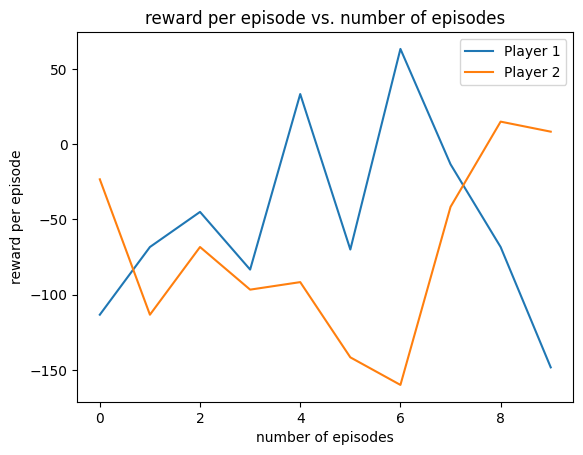

In [6]:
x = np.arange(episodes)

plt.plot(x, np.mean(p1ScoreList, axis = 0), label="Player 1")
plt.plot(x, np.mean(p2ScoreList, axis = 0), label="Player 2")

plt.title("average reward per episode vs. number of episodes")
plt.xlabel("number of episodes")
plt.ylabel("average reward per episode")
plt.legend()
plt.show()


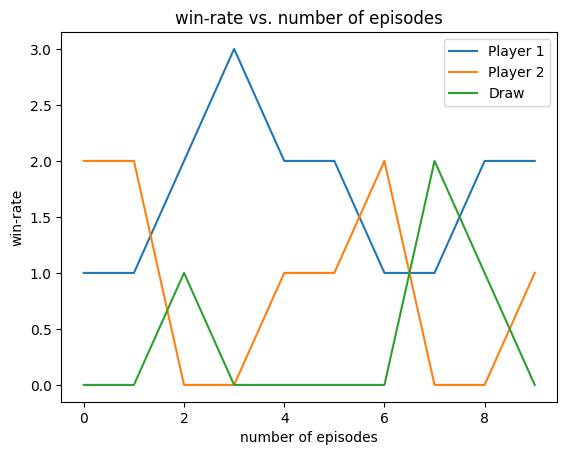

In [7]:
x = np.arange(episodes)

plt.plot(x, winrateList[0], label="Player 1")
plt.plot(x, winrateList[1], label="Player 2")
plt.plot(x, winrateList[2], label="Draw")

plt.title("win-rate vs. number of episodes")
plt.xlabel("number of episodes")
plt.ylabel("win-rate")
plt.legend()
plt.show()